In [58]:
install.packages('reticulate')

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [59]:
install.packages('devtools')

also installing the dependencies ‘glue’, ‘cli’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [43]:
install.packages('rpart.plot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [60]:
library( readr )
library( ggplot2 )
library( rpart )
library( randomForest )
library( readr )
library( pROC )
library( dplyr)
library(reticulate)
library(devtools)

Loading required package: usethis



In [2]:
# Load the dataset
iris=read.csv('/data/Iris.csv')

In [10]:
dim ( iris )
names( iris )
str( iris )
attributes( iris )
head( iris )
summary( iris )

[1] 150   5

[1] "SepalLengthCm"   "SepalWidthCm"    "PetalLengthCm"   "PetalWidthCm"   
[5] "Species_Encoded"

'data.frame':	150 obs. of  5 variables:
 $ SepalLengthCm  : num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm   : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm  : num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm   : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species_Encoded: int  0 0 0 0 0 0 0 0 0 0 ...


$names
[1] "SepalLengthCm"   "SepalWidthCm"    "PetalLengthCm"   "PetalWidthCm"   
[5] "Species_Encoded"

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0


 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
 Species_Encoded
 Min.   :0      
 1st Qu.:0      
 Median :1      
 Mean   :1      
 3rd Qu.:2      
 Max.   :2      

In [4]:
# First let's get a random sampling of the data
iris[sample(nrow(iris),10),]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
129,6.4,2.8,5.6,2.1,2
3,4.7,3.2,1.3,0.2,0
49,5.3,3.7,1.5,0.2,0
132,7.9,3.8,6.4,2.0,2
140,6.9,3.1,5.4,2.1,2
76,6.6,3.0,4.4,1.4,1
109,6.7,2.5,5.8,1.8,2
77,6.8,2.8,4.8,1.4,1
87,6.7,3.1,4.7,1.5,1


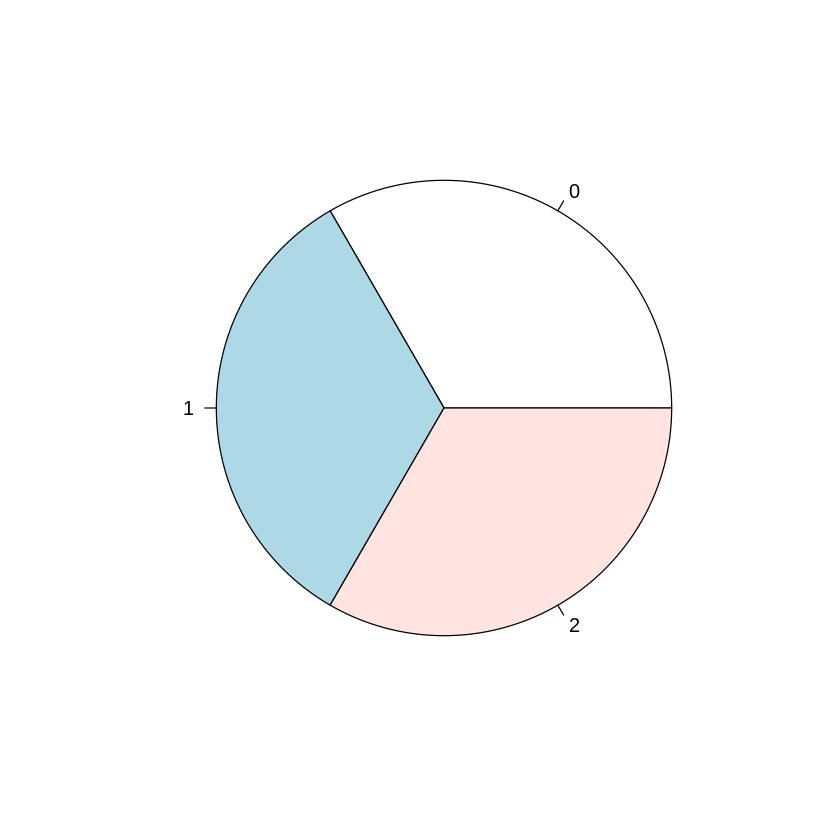

In [24]:
pie( table( iris$Species_Encoded ))

In [46]:
# Split Data into Training and Testing in R 
sample_size = floor(0.8*nrow(iris))
set.seed(777)

# randomly split data in r
iris$Species_Encoded = factor(iris$Species_Encoded)
picked = sample(seq_len(nrow(iris)),size = sample_size)
training =iris[picked,]
testing =iris[-picked,]

In [47]:
schema <- Species_Encoded~.

In [48]:
rf.model      <- randomForest( schema, data=training, method="class" )
rf.prediction <- predict( rf.model, testing )

rf.numericPrediction <- as.numeric( rf.prediction )
rf.roc               <- multiclass.roc( testing$Species_Encoded, rf.numericPrediction )
print( rf.roc ) # AUC = 100%

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = testing$Species_Encoded, predictor = rf.numericPrediction)

Data: rf.numericPrediction with 3 levels of testing$Species_Encoded: 0, 1, 2.
Multi-class area under the curve: 0.9889


In [55]:
y_true = testing$Species_Encoded
y_pred = predict( rf.model, testing )

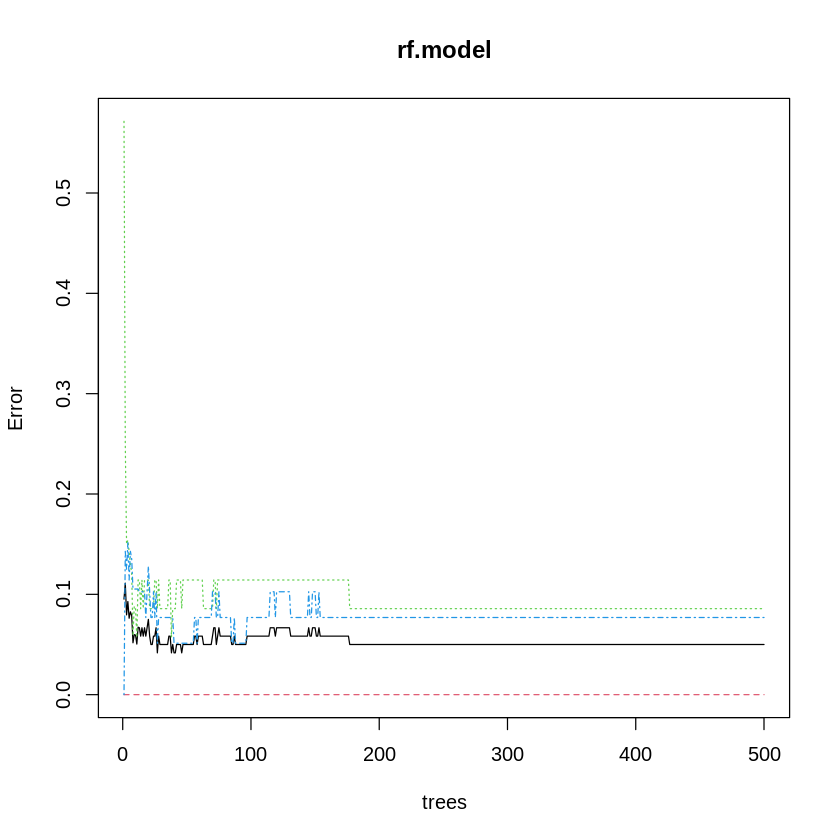

In [49]:
plot( rf.model )

In [50]:
importance( rf.model )

,MeanDecreaseGini
SepalLengthCm,8.065839
SepalWidthCm,2.120452
PetalLengthCm,35.423917
PetalWidthCm,33.175925


In [51]:
library(mosaicrml)

In [52]:
# Make predictions
score <- function(rf.model, request_path){
  data <- read.csv(request_path)
  data = select(data,  Species_Encoded,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)
  data$Species_Encoded = factor(data$Species_Encoded)
  #data$Pclass = factor(stevens$Pclass, order=TRUE, levels = c(3, 2, 1))
  
  #bet <- read.table(request_path)
  PredictForest <- predict(rf.model, newdata = data)
  return (toJSON(PredictForest))
}

In [53]:
predict_prob <- predict(rf.model, testing, type="prob")

In [61]:
value <- register_model(
  rf.model,
  score,
  name="Iris_Classification_R",
  description="Iris Classification R Model",
  flavour="r",
  input_type="file",
  y_true=y_true,
  y_pred=y_pred,
  prob=predict_prob,
  labels=list("Setoas","Versicolor","Virginica"),
  model_type="classification",
  )

[1] "Entering Register Model"
[1] "Creating model"
[1] "Creating version"
[1] "Model Registered"
[1] "Creating tar"
[1] "/tmp/Rtmpf3M16C/model.rds"
[1] "Saving models"
[1] "Creating Tar"
[1] "Build time metrics"


Loading required package: lattice

Warning message in plot.window(xlim, ylim, log, ...):
“"top" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"top" is not a graphical parameter”
Warning message in title(xlab = xlab, ylab = ylab, ...):
“"top" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"top" is not a graphical parameter”
